# Deep learning project 

## loading and reading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
adult_data=pd.read_csv(r"C:\Users\abdal\Downloads\adult.csv")
adult_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
adult_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
adult_data.info

<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marr

In [7]:
adult_data['age'].value_counts().reset_index().sort_values('age')

,age,count
38,17,595
31,18,862
28,19,1053
21,20,1113
24,21,1096
...,...,...
73,86,1
71,87,3
69,88,6
72,89,2


## cleaning data

In [8]:
sum(adult_data.duplicated())

52

In [9]:
adult_data.drop_duplicates(inplace=True)
sum(adult_data.duplicated())

0

In [10]:
# check for any null values (?)values 
adult_data.replace("?",np.nan,inplace=True)
adult_data.isnull().sum()


age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [11]:
# Here i fill all null values with forward fill NAN
adult_data.ffill(inplace=True)
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
adult_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Visualization

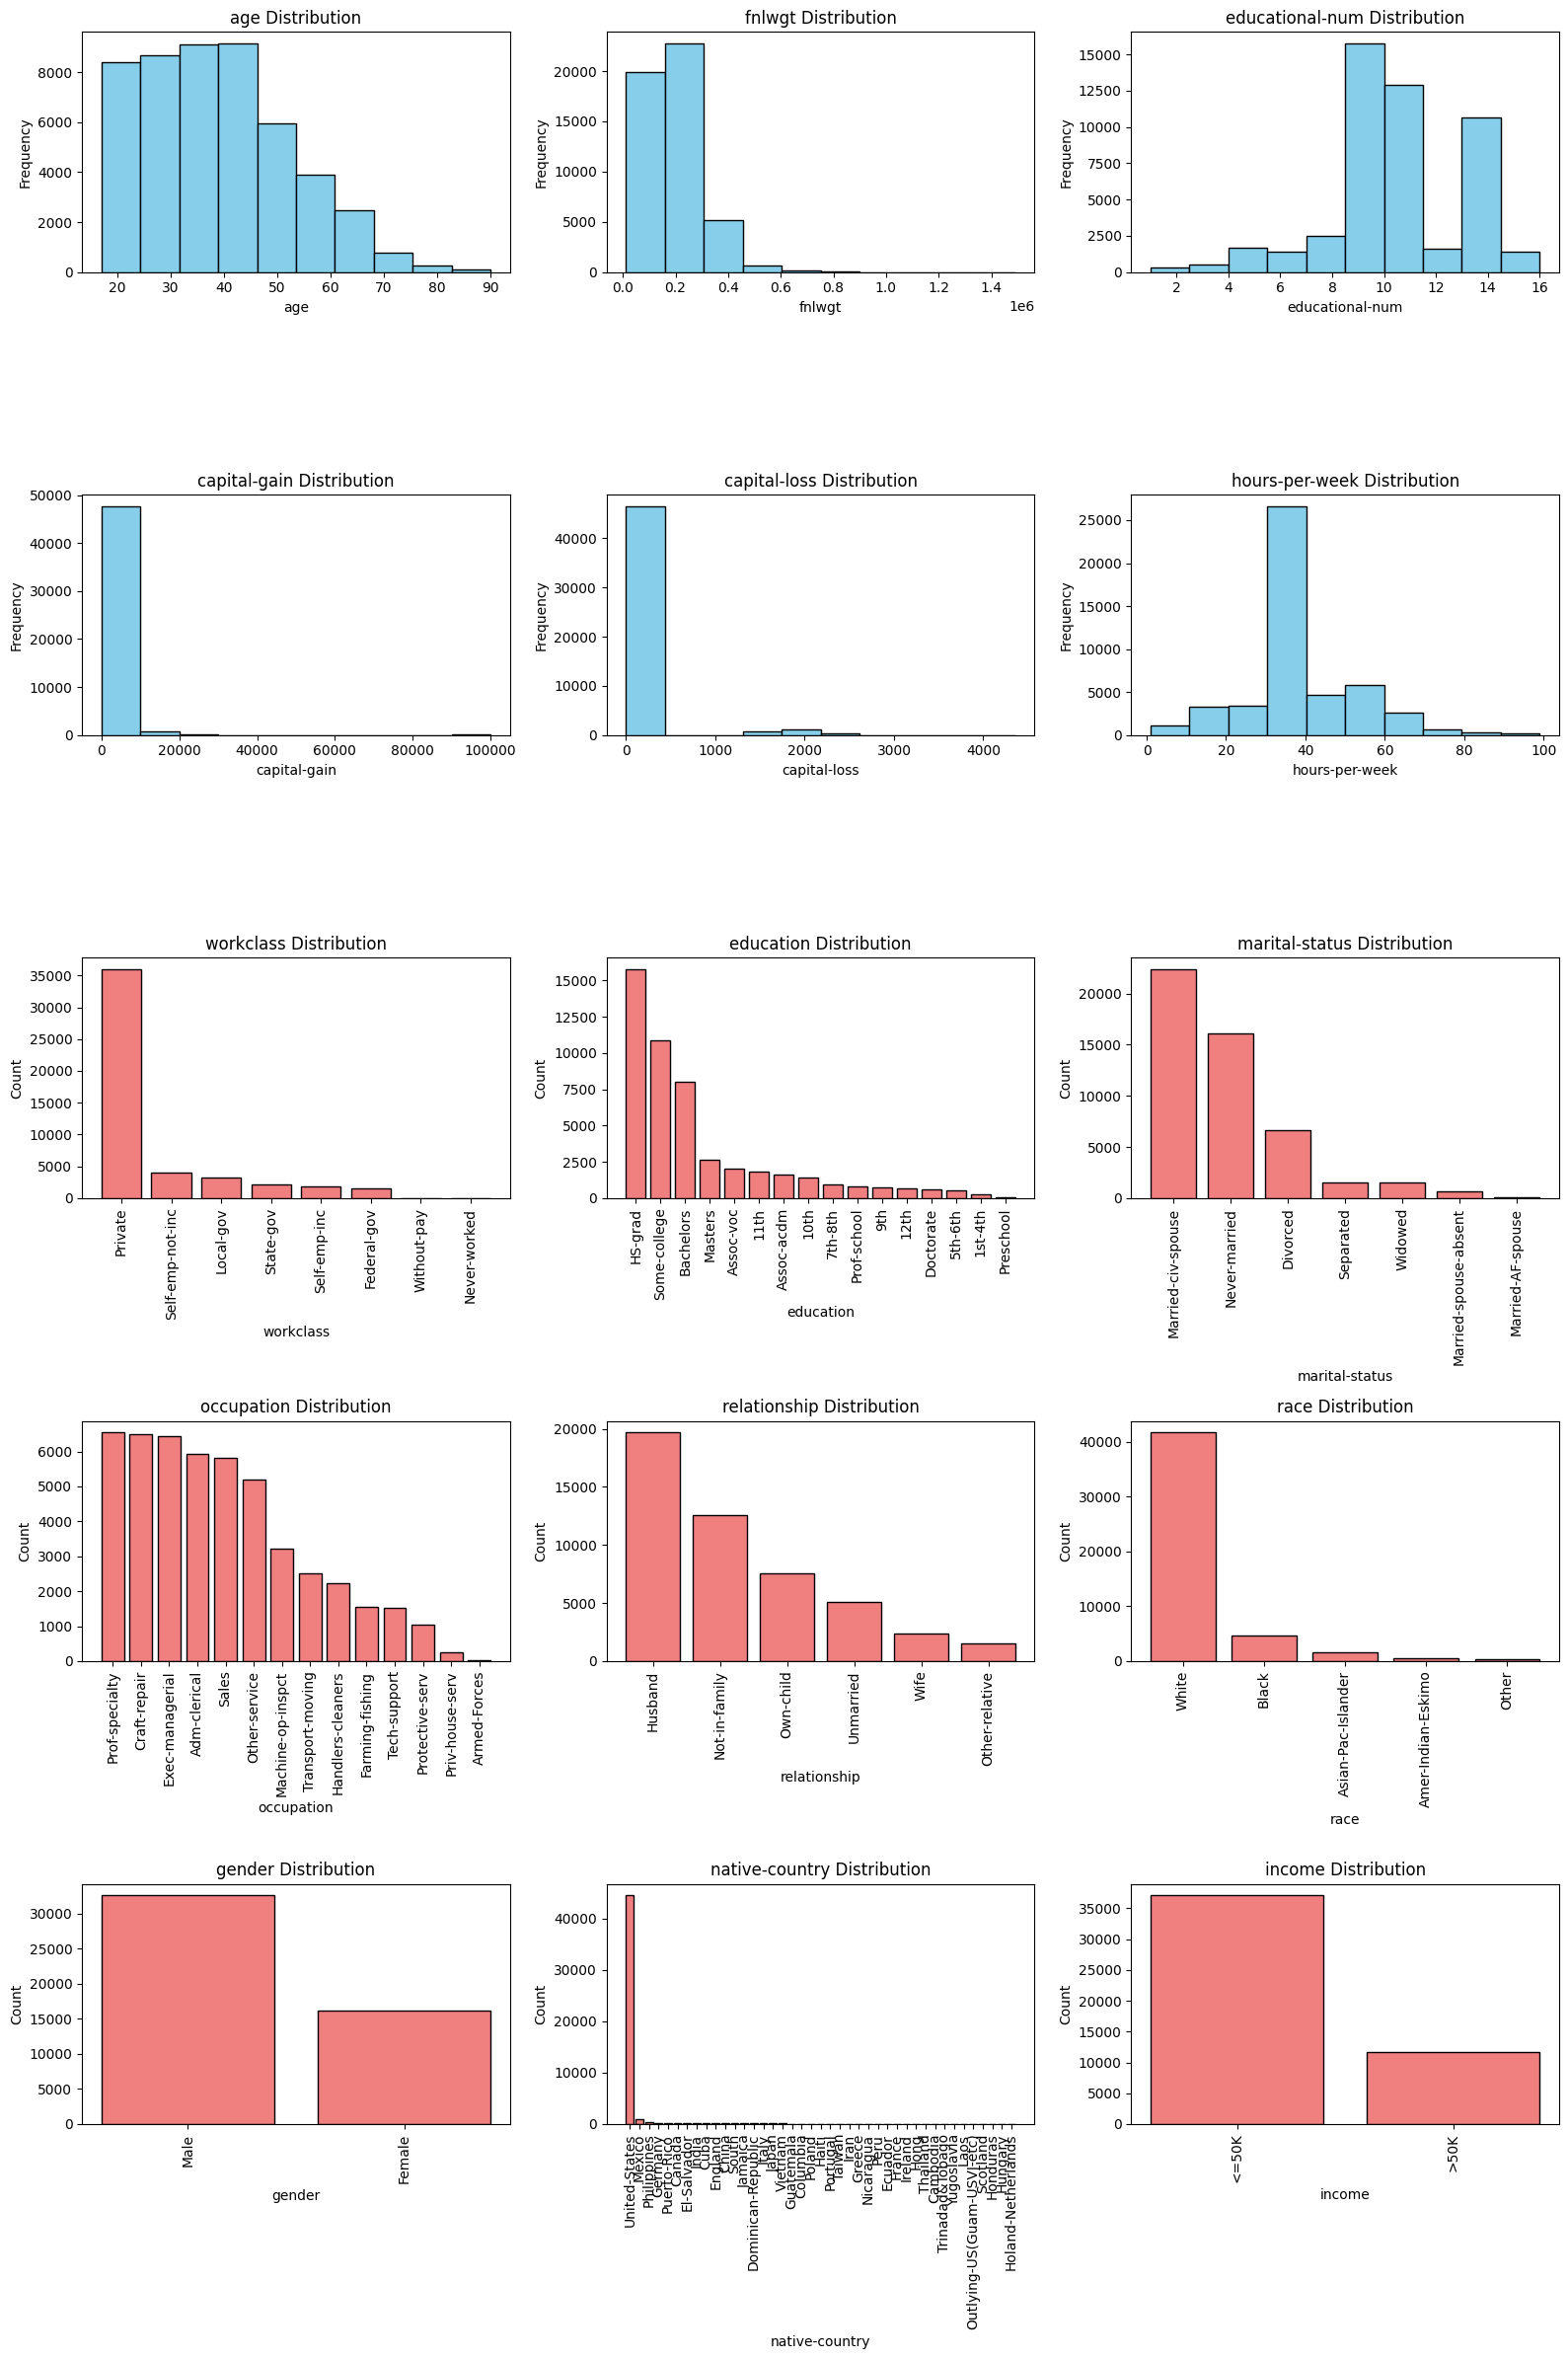

In [13]:
import matplotlib.pyplot as plt
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week',]
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

plt.figure(figsize=(16, 24))

for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i + 1)
    plt.hist(adult_data[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i + len(numeric_cols) + 1)
    value_counts = adult_data[col].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='lightcoral', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  

plt.tight_layout()

plt.show()


## Label encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
for i in adult_data:
    if(adult_data[i].dtype=='object'):
        adult_data[i]=ordinal_encoder.fit_transform(adult_data[[i]])



In [15]:
adult_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3.0,226802,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,38.0,0.0
1,38,3.0,89814,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,38.0,0.0
2,28,1.0,336951,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,38.0,1.0
3,44,3.0,160323,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,38.0,1.0
4,18,3.0,103497,15.0,10,4.0,6.0,3.0,4.0,0.0,0,0,30,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
48838,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
48839,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
48840,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


## correlation

In [16]:
# Let's make correlation
adult_data.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.043170,-0.076451,-0.015142,0.030635,-0.263594,-0.006378,-0.263395,0.028803,0.088043,0.077185,0.056838,0.071223,-0.003329,0.230144
workclass,0.043170,1.000000,-0.024923,0.003446,0.005926,-0.017913,0.014218,-0.052345,0.050532,0.063110,0.030712,0.003930,0.035928,-0.005896,-0.002177
fnlwgt,-0.076451,-0.024923,1.000000,-0.022539,-0.038727,0.029779,-0.000581,0.009017,-0.027165,0.027879,-0.003715,-0.004378,-0.013521,-0.058034,-0.006309
education,-0.015142,0.003446,-0.022539,1.000000,0.359825,-0.037449,-0.029404,-0.010861,0.013387,-0.027120,0.028958,0.017672,0.057877,0.074673,0.080118
educational-num,0.030635,0.005926,-0.038727,0.359825,1.000000,-0.069859,0.086699,-0.090697,0.029331,0.009364,0.125219,0.080986,0.143915,0.088277,0.332802
marital-status,-0.263594,-0.017913,0.029779,-0.037449,-0.069859,1.000000,0.015917,0.187770,-0.070111,-0.127505,-0.043924,-0.033790,-0.185444,-0.018234,-0.198855
occupation,-0.006378,0.014218,-0.000581,-0.029404,0.086699,0.015917,1.000000,-0.047784,-0.001212,0.052203,0.018004,0.010574,0.013676,-0.003437,0.046033
relationship,-0.263395,-0.052345,0.009017,-0.010861,-0.090697,0.187770,-0.047784,1.000000,-0.116985,-0.579955,-0.056543,-0.057243,-0.250319,-0.006740,-0.253175
race,0.028803,0.050532,-0.027165,0.013387,0.029331,-0.070111,-0.001212,-0.116985,1.000000,0.086959,0.011610,0.018640,0.039759,0.119557,0.070970
gender,0.088043,0.063110,0.027879,-0.027120,0.009364,-0.127505,0.052203,-0.579955,0.086959,1.000000,0.047127,0.045517,0.228529,-0.003744,0.214639


## Split the data

In [17]:
adult_data['age_cat']=pd.cut(adult_data['age'],
                                bins=[16,27,37,47,57,67,77,np.inf],
                                labels=[1,2,3,4,5,6,7])

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split1=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=23)

for train_set,rest_data in split1.split(adult_data,adult_data['age_cat']):
    train_set=adult_data.iloc[train_set]
    rest_data=adult_data.iloc[rest_data]

split2=StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=23)

for validation_set,test_set in split2.split(rest_data,rest_data['age_cat']):
    validation_set=rest_data.iloc[validation_set]
    test_set=rest_data.iloc[test_set]


In [19]:
train_set['age_cat'].value_counts()/len(train_set)

age_cat
2    0.265482
1    0.245601
3    0.235528
4    0.148215
5    0.077973
6    0.022106
7    0.005095
Name: count, dtype: float64

In [20]:
validation_set['age_cat'].value_counts()/len(validation_set)

age_cat
2    0.265510
1    0.245559
3    0.235447
4    0.148128
5    0.078027
6    0.022137
7    0.005193
Name: count, dtype: float64

In [21]:
test_set['age_cat'].value_counts()/len(test_set)

age_cat
2    0.265473
1    0.245662
3    0.235551
4    0.148244
5    0.078016
6    0.021998
7    0.005055
Name: count, dtype: float64

## Prepare data

In [22]:
# drop the target columns 
adult_train=train_set.drop(columns='income')
adult_train_target=train_set['income']

adult_validation=validation_set.drop(columns='income')
adult_validation_target=validation_set['income']

adult_test=test_set.drop(columns='income')
adult_test_target=test_set['income']

In [23]:
adult_train_target

4005     0.0
46656    1.0
26322    1.0
6318     0.0
26477    0.0
        ... 
3636     1.0
10493    0.0
21248    1.0
29861    0.0
10388    0.0
Name: income, Length: 34153, dtype: float64

In [24]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_cat'],
      dtype='object')

## Standardization 

In [25]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
adult_train_prepared=std.fit_transform(adult_train)
adult_validation_prepared=std.fit_transform(adult_validation)
adult_test_prepared=std.fit_transform(adult_test)


## Let's build the Machine learning models

### logistic regression model

In [1057]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(adult_train_prepared,adult_train_target)
accuracy=log.score(adult_test_prepared,adult_test_target)
print("The accuracy = ",accuracy*100)

The accuracy =  82.60691351277497


Hyperparameter tuning

In [1002]:
# Implement hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],    
    'penalty': ['l1', 'l2'],                       
    'solver': ['liblinear', 'saga'],                
    'class_weight': [None, 'balanced'],                          
    'tol': [1e-4, 1e-3],                          
}

grid_search = GridSearchCV(log, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(adult_validation_prepared, adult_validation_target)
print("Best parameters:", grid_search.best_params_)


Fitting 2 folds for each of 112 candidates, totalling 224 fits
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


In [1003]:
Best_parameters= {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}

In [1004]:
# Train and test the model again
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(**Best_parameters)
log.fit(adult_train_prepared,adult_train_target)
accuracy=log.score(adult_test_prepared,adult_test_target)
print("The accuracy = ",accuracy*100)
# Here we can see the accuaracy doesn't change

The accuracy =  82.60691351277497


In [1005]:
# Calculate the Accuracy,Precision,Recall,f1_score,Confusion Matrix

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predict=log.predict(adult_test_prepared)

accuracy =accuracy_score(adult_test_target,predict)

precision=precision_score(adult_test_target,predict,average='weighted')

recall=recall_score(adult_test_target,predict,average='weighted')

f1=f1_score(adult_test_target,predict,average='weighted')

confusion=confusion_matrix(adult_test_target,predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8260691351277497
Precision: 0.8153221400885108
Recall: 0.8260691351277497
F1 Score: 0.8111241797430929
Confusion Matrix:
[[5237  307]
 [ 966  809]]


### RandomForset model

In [1006]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(adult_train,adult_train_target)
accuracy=rand.score(adult_test,adult_test_target)
print("The accuracy = ",accuracy*100)

The accuracy =  85.76308238830441


In [535]:
# making cross validation just for knowledge
from sklearn.model_selection import cross_val_score
scores =cross_val_score(rand,adult_train,adult_train_target,scoring='accuracy',cv=10 ) 
print("Scores:", scores*100)
# Here I make cross validation Just to showing the accuracy in defferent division of trainingSet

Scores: [86.37028371 85.66832407 85.81456566 84.76162621 85.66832407 84.87861948
 84.79087452 86.10704884 85.81456566 85.51784669]


In [1007]:
# Implement hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],             
    'max_features': ['auto', 'sqrt', 'log2'],      
    'max_depth': [None, 10, 20, 30, 40, 50],        
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                  
    'bootstrap': [True, False]                       
}

grid_search = GridSearchCV(rand, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(adult_validation, adult_validation_target)
print("Best parameters:", grid_search.best_params_)


Fitting 2 folds for each of 1296 candidates, totalling 2592 fits


c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
864 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [1058]:
Best_parameterss= {'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}
Best_parameterss

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [1059]:
# Train and test the model again 
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(**Best_parameterss)
rand.fit(adult_train,adult_train_target)
accuracy=rand.score(adult_test,adult_test_target)
print("The accuracy = ",accuracy*100)
# Here we can see the accuaracy increased little bit

The accuracy =  86.07733296898483


In [1060]:
# Calculate the Accuracy,Precision,Recall,f1_score,Confusion Matrix

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predict=rand.predict(adult_test)

accuracy =accuracy_score(adult_test_target,predict)

precision=precision_score(adult_test_target,predict,average='weighted')

recall=recall_score(adult_test_target,predict,average='weighted')

f1=f1_score(adult_test_target,predict,average='weighted')

confusion=confusion_matrix(adult_test_target,predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8607733296898483
Precision: 0.8555433079659762
Recall: 0.8607733296898483
F1 Score: 0.852176884032583
Confusion Matrix:
[[5289  255]
 [ 764 1011]]


## Let's build the ANN models

In [26]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from keras.callbacks import EarlyStopping



In [27]:
ann_model=Sequential()
ann_model.add(Dense(units=64,activation='relu',input_dim=len(pd.DataFrame(adult_train_prepared).columns)))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))

c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [30]:
history=ann_model.fit(adult_train_prepared,adult_train_target,epochs=200,batch_size=64,validation_data=(adult_validation_prepared,adult_validation_target))

Epoch 1/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7864 - loss: 0.4313 - val_accuracy: 0.8444 - val_loss: 0.3301
Epoch 2/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.8454 - loss: 0.3302 - val_accuracy: 0.8475 - val_loss: 0.3209
Epoch 3/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8499 - loss: 0.3237 - val_accuracy: 0.8547 - val_loss: 0.3167
Epoch 4/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.8495 - loss: 0.3205 - val_accuracy: 0.8493 - val_loss: 0.3169
Epoch 5/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.8541 - loss: 0.3151 - val_accuracy: 0.8521 - val_loss: 0.3158
Epoch 6/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.8552 - loss: 0.3135 - val_accuracy: 0.8534 - val_loss: 0.3158
Epoch 7/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8539 - loss: 0.3109 - val_accuracy: 0.8517 - val_loss: 0.3137
Epoch 8/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8570 - loss: 0.3

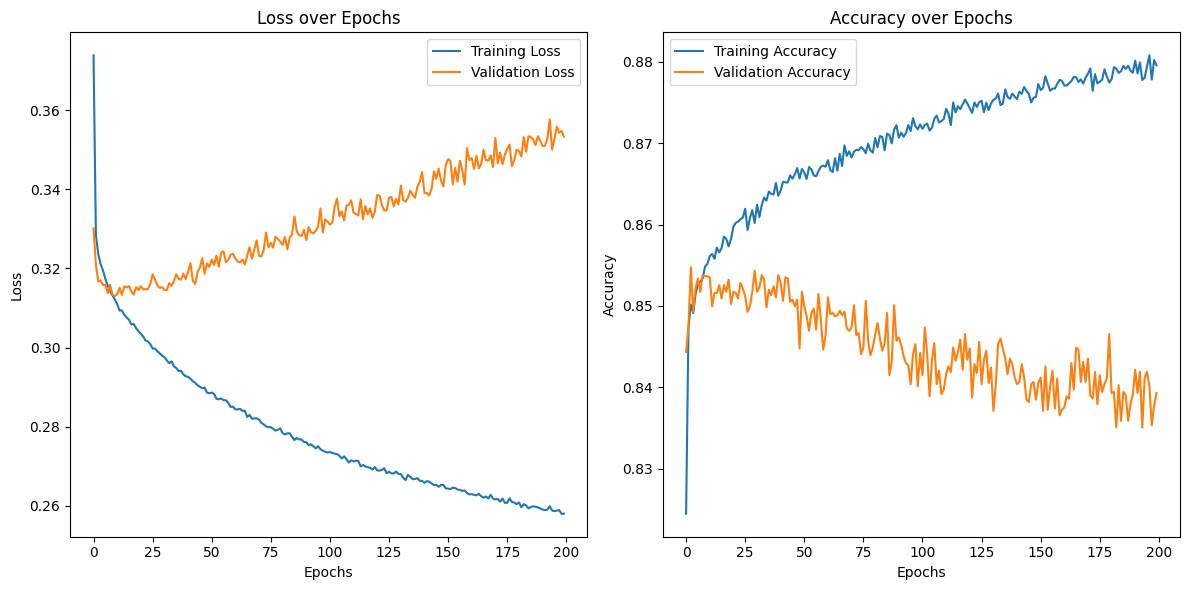

In [31]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## From the figure it seems here there is an overfiting because Training loss decreased while validation loss increased 
# and same for the accuracy when it's increased in Training it's decreased in validation 
# To solve this problem we might make regularization or adjust hyperparameter tuning or implement early stopping function or reduce number of iteration , etc.. 

In [32]:
# Test the modle using testSet

prediction=ann_model.predict(adult_test_prepared)
prediction = [0 if val < 0.5 else 1 for val in prediction]
print('accuracy = ',accuracy_score(adult_test_target,prediction))
print('confiusion matrix = ',confusion_matrix(adult_test_target,prediction))


229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
accuracy =  0.8421915562235278
confiusion matrix =  [[5082  462]
 [ 693 1082]]


Epoch 1/200


c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8026 - loss: 0.4186 - val_accuracy: 0.8470 - val_loss: 0.3288
Epoch 2/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8399 - loss: 0.3359 - val_accuracy: 0.8482 - val_loss: 0.3207
Epoch 3/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.8485 - loss: 0.3231 - val_accuracy: 0.8479 - val_loss: 0.3189
Epoch 4/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8480 - loss: 0.3262 - val_accuracy: 0.8491 - val_loss: 0.3187
Epoch 5/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8546 - loss: 0.3186 - val_accuracy: 0.8520 - val_loss: 0.3155
Epoch 6/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8519 - loss: 0.3186 - val_accuracy: 0.8519 - val_loss: 0.3165
Epoch 7/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8556 - loss: 0.3140 - val_accuracy: 0.8480 - val_loss: 0.3153
Epoch 8/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8543 - loss: 0.3146 - val_ac

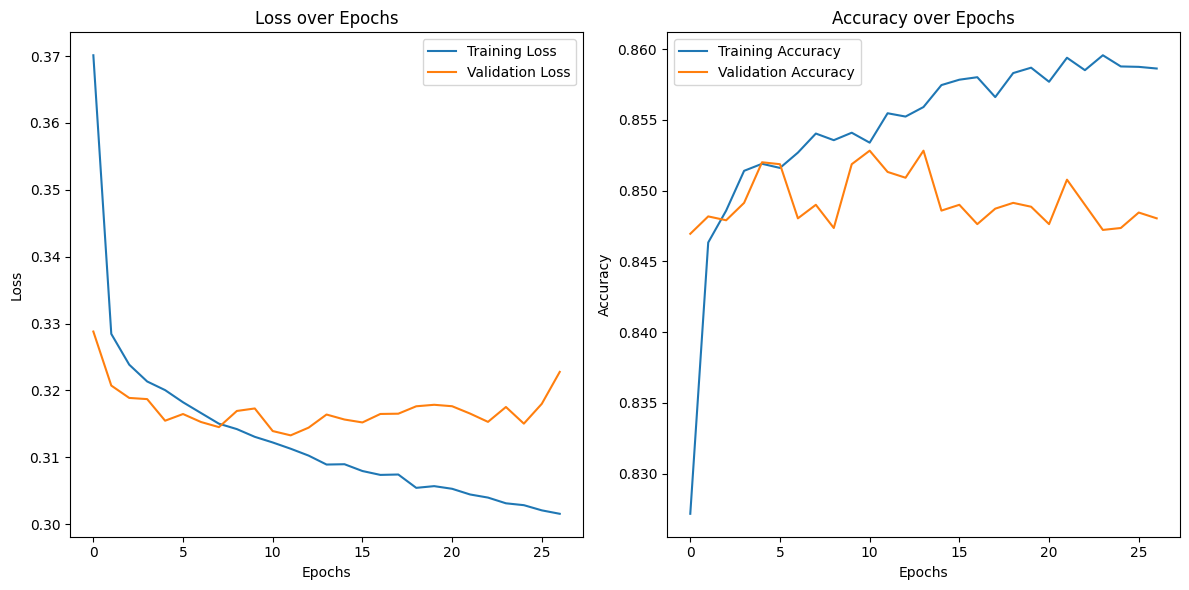

In [33]:
# now model with early stopping function 
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
ann_model=Sequential()
ann_model.add(Dense(units=64,activation='relu',input_dim=len(pd.DataFrame(adult_train_prepared).columns)))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=ann_model.fit(adult_train_prepared,adult_train_target,epochs=200,batch_size=64,validation_data=(adult_validation_prepared,adult_validation_target),callbacks=[early_stopping])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Here we can see we avoid overfitting because of early stopping so the two lines were close together



In [34]:
# Test the modle using testSet

prediction=ann_model.predict(adult_test_prepared)
prediction = [0 if val < 0.5 else 1 for val in prediction]
print('accuracy = ',accuracy_score(adult_test_target,prediction))
print('confiusion matrix = ',confusion_matrix(adult_test_target,prediction))


229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
accuracy =  0.8497062440224075
confiusion matrix =  [[5157  387]
 [ 713 1062]]


Epoch 1/200


c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3673 - loss: 0.7327 - val_accuracy: 0.5939 - val_loss: 0.6758
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5959 - loss: 0.6748 - val_accuracy: 0.7510 - val_loss: 0.6292
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7498 - loss: 0.6283 - val_accuracy: 0.7605 - val_loss: 0.5923
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7610 - loss: 0.5915 - val_accuracy: 0.7609 - val_loss: 0.5637
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7612 - loss: 0.5630 - val_accuracy: 0.7609 - val_loss: 0.5424
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7612 - loss: 0.5418 - val_accuracy: 0.7609 - val_loss: 0.5271
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7612 - loss: 0.5268 - val_accuracy: 0.7609 - val_loss: 0.5167
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7612 - loss: 0.5166 - val_accuracy: 0.7609 - val_loss: 0.5095
Epoch 

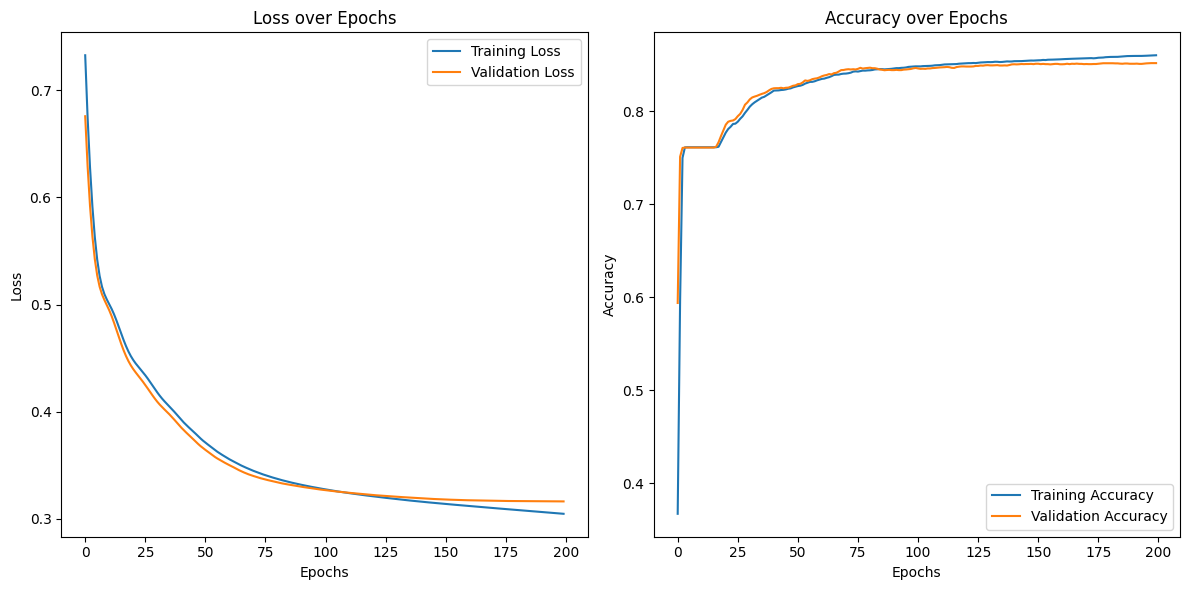

In [35]:
# Now new model with defferent layers and full batch technique (واثق الخطى يمشي ملكا)
ann_model=Sequential()
ann_model.add(Dense(units=32,activation='relu',input_dim=len(pd.DataFrame(adult_train_prepared).columns)))
ann_model.add(Dense(units=64,activation='tanh'))
ann_model.add(Dense(units=128,activation='relu'))
ann_model.add(Dense(units=64,activation='relu'))
ann_model.add(Dense(units=32,activation='tanh'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=ann_model.fit(adult_train_prepared,adult_train_target,epochs=200,batch_size=len(adult_train_prepared),validation_data=(adult_validation_prepared,adult_validation_target))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Here we can see it begins with so bad accuracy but then the accuracy increased by each epoch 

In [36]:
# Test the modle using testSet

prediction=ann_model.predict(adult_test_prepared)
prediction = [0 if val < 0.5 else 1 for val in prediction]
print('accuracy = ',accuracy_score(adult_test_target,prediction))
print('confiusion matrix = ',confusion_matrix(adult_test_target,prediction))



229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
accuracy =  0.8514824429566881
confiusion matrix =  [[5159  385]
 [ 702 1073]]


Summarize All the models close together for the accuarcy but the best mode is 
Random forset with 86% accuracy then
ANN models with around 85% accuracy then 
Logistic Regression with 82% accuracy 

regarding for the speed all models close together I think because the data was not so big .

And thats it for this project,
I hope I'm doing well and thank you very much 